# U.S. Medical Insurance Costs

## Project Scope


1.  Age vs. Cost Relationship

*   Explore how medical costs vary across age groups.
*   Consider binning ages (e.g., 18–25, 26–35…) to visualize trends.

2. BMI Impact on Charges

*   Investigate whether higher BMI correlates with increased medical costs.
*   Could be extended to explore interaction effects with smoking status.

3. Regional Cost Disparities

*   Compare average charges across different regions.
*   Useful for identifying systemic differences or policy implications.

4. Children and Cost

*   Analyze if the number of children a patient has affects insurance charges.
*   Could hint at family coverage dynamics or socioeconomic factors.

5. Multivariate Cost Drivers

*   Build a simple regression or decision tree to identify which features most influence cost.
*   Helps prioritize interventions or policy recommendations.

6. Outlier Detection

*   Identify patients with unusually high or low charges.
*   Useful for flagging data quality issues or rare cases.

7. Gender + Smoking Interaction

*   Compare costs across four groups: male smoker, male non-smoker, female smoker, female non-smoker.
*   Reveals compound effects that might be missed in isolated comparisons.

8. Distribution Analysis

*   Visualize the distribution of charges, ages, or BMI to understand skewness and spread.
*   Supports decisions on normalization or transformation for modeling.

#### Dataset Exploration

In [34]:
import pandas as pd
from IPython.display import Markdown

dataframe = pd.read_csv('../data/insurance.csv')

display(Markdown('**Data Overview**'))
print(dataframe.head())

display(Markdown('**Data Info**'))
dataframe.info()
dataframe.describe()

**Data Overview**

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


**Data Info**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


    The dataset contains 1,338 entries with no missing values, covering demographic and lifestyle factors that may influence medical insurance charges. 

Key features include:

*   Age: Ranges from young adults to seniors
*   Sex: Binary classification (male/female)
*   BMI: Continuous variable indicating body mass index
*   Children: Number of dependents
*   Smoker: Yes/No indicator
*   Region: Four U.S. regions (northeast, northwest, southeast, southwest)
*   Charges: Annual medical insurance cost in USD
*   Max Age is 64 and Min Age is 18
*   Average insurance cost is 13270$


Initial Observations

*   Charges vary widely, with some individuals incurring costs above $20,000.
*   Smokers appear to be associated with higher charges.
*   Regional and gender-based differences may exist, warranting further analysis.
*   The dataset is well-structured and ready for statistical exploration or modeling.


#### Age vs. Cost Relationship

In [38]:
import csv

ages = []
costs = []

with open("../data/insurance.csv") as insurance_data:
    insurance_dict = csv.DictReader(insurance_data)
    for row in insurance_dict:
        ages.append(int(row['age']))
        costs.append(float(row['charges']))
        
print(ages)
print(costs)

[19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23, 56, 27, 19, 52, 23, 56, 30, 60, 30, 18, 34, 37, 59, 63, 55, 23, 31, 22, 18, 19, 63, 28, 19, 62, 26, 35, 60, 24, 31, 41, 37, 38, 55, 18, 28, 60, 36, 18, 21, 48, 36, 40, 58, 58, 18, 53, 34, 43, 25, 64, 28, 20, 19, 61, 40, 40, 28, 27, 31, 53, 58, 44, 57, 29, 21, 22, 41, 31, 45, 22, 48, 37, 45, 57, 56, 46, 55, 21, 53, 59, 35, 64, 28, 54, 55, 56, 38, 41, 30, 18, 61, 34, 20, 19, 26, 29, 63, 54, 55, 37, 21, 52, 60, 58, 29, 49, 37, 44, 18, 20, 44, 47, 26, 19, 52, 32, 38, 59, 61, 53, 19, 20, 22, 19, 22, 54, 22, 34, 26, 34, 29, 30, 29, 46, 51, 53, 19, 35, 48, 32, 42, 40, 44, 48, 18, 30, 50, 42, 18, 54, 32, 37, 47, 20, 32, 19, 27, 63, 49, 18, 35, 24, 63, 38, 54, 46, 41, 58, 18, 22, 44, 44, 36, 26, 30, 41, 29, 61, 36, 25, 56, 18, 19, 39, 45, 51, 64, 19, 48, 60, 27, 46, 28, 59, 35, 63, 40, 20, 40, 24, 34, 45, 41, 53, 27, 26, 24, 34, 53, 32, 19, 42, 55, 28, 58, 41, 47, 42, 59, 19, 59, 39, 40, 18, 31, 19, 44, 23, 33, 55, 40, 63, 54, 60, 24, 19, 29,

In [39]:
def age_vs_cost(ages, costs):
    age_bins = {
        (18, 25): {"total_charges": 0, "count": 0},
        (26, 35): {"total_charges": 0, "count": 0},
        (36, 45): {"total_charges": 0, "count": 0},
        (46, 55): {"total_charges": 0, "count": 0},
        (56, 65): {"total_charges": 0, "count": 0}
    }

    for person_age, person_cost in zip(ages, costs):
        for bin_range in age_bins:
            if bin_range[0] <= person_age <= bin_range[1]:
                age_bins[bin_range]["total_charges"] += person_cost
                age_bins[bin_range]["count"] += 1
                break

    return age_bins

age_bin_data = age_vs_cost(ages, costs)
print(age_bin_data)

{(18, 25): {'total_charges': 2780626.8369189994, 'count': 306}, (26, 35): {'total_charges': 2812703.696569999, 'count': 268}, (36, 45): {'total_charges': 3562280.1051499997, 'count': 264}, (46, 55): {'total_charges': 4540279.68791, 'count': 284}, (56, 65): {'total_charges': 4059934.6642099973, 'count': 216}}


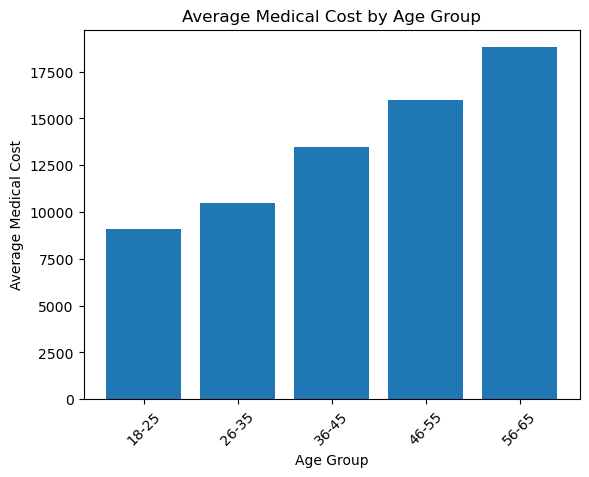

In [40]:
import matplotlib.pyplot as plt

age_labels = [f"{age_range[0]}-{age_range[1]}" for age_range in age_bin_data.keys()]
average_costs = [data["total_charges"] / data["count"] if data["count"] > 0 else 0 for data in age_bin_data.values()]

plt.bar(age_labels, average_costs)
plt.xlabel("Age Group")
plt.ylabel("Average Medical Cost")
plt.title("Average Medical Cost by Age Group")
plt.xticks(rotation=45)
plt.show()

The chart clearly illustrates a progressive increase in average medical insurance cost as age rises, which reflects real-world dynamic. It’s a reflection of how risk-based pricing and age-related health trends shape insurance economics.